|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif"> |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|

### Section10.4, chauffage par effet Brinkman: source de chauffage causé par la viscosité

> <img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-10-Section-10-4.png'>
>> Ici on traitera le problème de façon légèrement différente de Transport Phenomena, en effet, pour traiter ce problème on peut aller chercher les équations générales de l'annexe B.9.

>>Regardons donc l'équation B.9-1 qui est utilisée puisqu'on suppose que le système a une courbure négligeable et peut être traité en coordonnées cartésiennes.<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-10-Section-10-4-2.png'>
Tous les termes de gauche sont nuls car:

>>> On veut le résultat en état de régime, donc la dérivée en fonction du temps est nulle.

>>> Il n'y a pas de vitesse dans la direction x ni dans la direction y, et il n'y a pas de gradient de température dans la direction z.

>>> Le seul terme dans les dérivées de la température qui reste à droite est celui dans la direction x, et le terme de source $\Phi$, donc:

>>>> ###  $k \frac {\partial^2 T}{\partial x^2}+\mu \Phi_v = 0$

>> Le terme de source visqueuse est obtenu par l'annexe B7 

> <img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-10-Section-10-4-3.png'>

qui peut sembler très complexe (en effet) mais tous les termes s'annulent sauf celui du gradient de $v_z$ en fonction de x donc:

>>>> ### $\Phi_v =\big(\frac {\partial v_z}{\partial x} \big)^2 $
>> L'équation à résoudre sera donc directement:

>>>> ### $k \frac {\partial^2 T}{\partial x^2}+ \mu \big(\frac {\partial v_z}{\partial x} \big)^2= 0$

> Et puisque le profil de vitesse vous a déjà été donné sur la figure 10.4-2, on pourra résoudre

In [7]:
#
# Pierre Proulx
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp          
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline

In [8]:
# Paramètres, variables et fonctions
#
mu,k,b,Tb,T0,vb,x=sp.symbols('mu k b T_b T_0 v_b x')
T=sp.Function('T')(x)
v=sp.Function('v')(x)

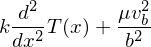

In [9]:
v=vb*x/b
eq=k*T.diff(x,x)+mu*v.diff(x)**2
display(eq)

'Le profil de température, solution générale avec les constantes inconnues'

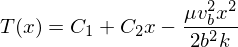

In [10]:
T=sp.dsolve(eq)
display('Le profil de température, solution générale avec les constantes inconnues',T)

'Les conditions aux limites'

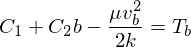

'Les constantes après solution'

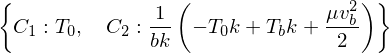

'Le profil de température final'

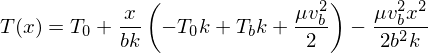

In [11]:
condition_1=sp.Eq(T.rhs.subs(x,0),T0)
condition_2=sp.Eq(T.rhs.subs(x,b),Tb)
display('Les conditions aux limites',condition_1, condition_2)
constantes=sp.solve([condition_1,condition_2],sp.symbols('C1,C2'))
display('Les constantes après solution',constantes)
T=T.subs(constantes)
display('Le profil de température final',T)

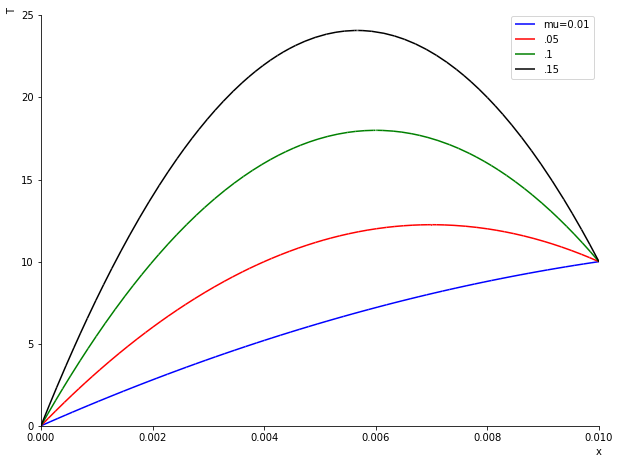

In [12]:
### Tracage
T=T.rhs
dico={'T_0':0,'T_b':10,'k':0.1,'mu':0.01,'b':0.01,'v_b':10}
T1=T.subs(dico)
dico={'T_0':0,'T_b':10,'k':0.1,'mu':0.05,'b':0.01,'v_b':10}
T2=T.subs(dico)
dico={'T_0':0,'T_b':10,'k':0.1,'mu':0.1,'b':0.01,'v_b':10}
T3=T.subs(dico)
dico={'T_0':0,'T_b':10,'k':0.1,'mu':0.15,'b':0.01,'v_b':10}
T4=T.subs(dico)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,8
p=sp.plot((T1,(x,0,0.01)),(T2,(x,0,0.01)),(T3,(x,0,0.01)),(T4,(x,0,0.01)),
       legend=True,ylabel='T',xlabel='x',show=False)
p[0].label='mu=0.01'
p[1].label='.05'
p[2].label='.1'
p[3].label='.15'
p[0].line_color='blue'
p[1].line_color='red'
p[2].line_color='green'
p[3].line_color='black'
p.show()